In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from dlem import util
from dlem import load_model
from dlem.feature_extraction import extractor
import seaborn

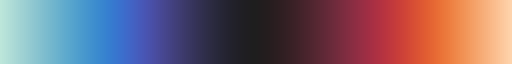

In [2]:
seaborn.color_palette("icefire", as_cmap=True)

In [3]:
dev = torch.device('cuda')

In [4]:
patch = np.log(np.load("data/patch.npy"))

In [5]:
patch = util.tile_patch(patch, kernel_size=10)

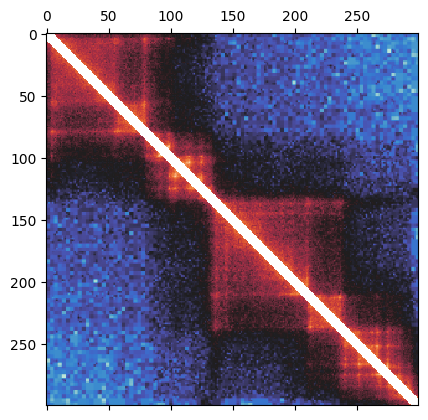

In [6]:
plt.matshow(util.ignore_diag_plot(patch, 5), cmap='icefire')

In [7]:
patch = util.diagonal_normalize(patch[np.newaxis])[0]

/data/src/loopextrusion_pytorch/.conda/lib/python3.11/site-packages/dlem/util.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mat = torch.tensor(mat)


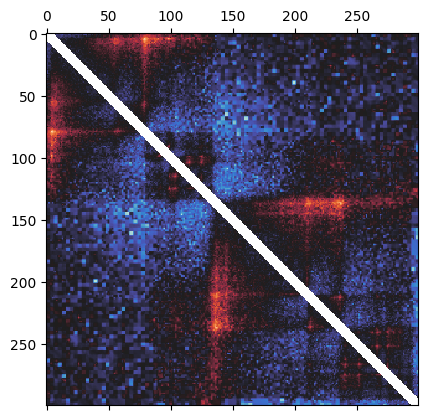

In [8]:
plt.matshow(util.ignore_diag_plot(patch, 5), cmap='icefire')

In [9]:
out = extractor(patch,
                learning_rate=0.5,
                arch="netdlem2",
                diag_start=3,
                diag_stop=None,
                loss=torch.nn.MSELoss(reduction='mean'),
                patience=25,
                dev_name='cuda',
                do_plot=True,
                plot_path="/data/src/loopextrusion_pytorch/dlem/.data/test.png")

/data/src/loopextrusion_pytorch/.conda/lib/python3.11/site-packages/dlem/util.py:157: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).to(dev)
/data/src/loopextrusion_pytorch/.conda/lib/python3.11/site-packages/dlem/util.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mat = torch.tensor(mat)


In [10]:
out[0][0].shape

(300,)

In [11]:
out[1]

0.6575847102051039